![Ejercicio 1 - Playground Tensorflow](CapturaTensorflow.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

def generar_espirales(puntos, ruido=.5):
    angulos = np.sqrt(np.random.rand(puntos, 1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(angulos)*angulos + np.random.rand(puntos, 1) * ruido
    d1y = np.sin(angulos)*angulos + np.random.rand(puntos, 1) * ruido
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), np.hstack((np.zeros(puntos),np.ones(puntos))))

X, y = generar_espirales(1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

2024-04-09 00:14:45.511644: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Configuracion 1
model1 = Sequential()
model1.add(Dense(8, input_dim=2, kernel_initializer='normal', activation='relu'))
model1.add(Dense(6, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
opt = Adam(0.03)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train,epochs=1000,batch_size=512,validation_data=(X_test, y_test),verbose=0)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 984us/step


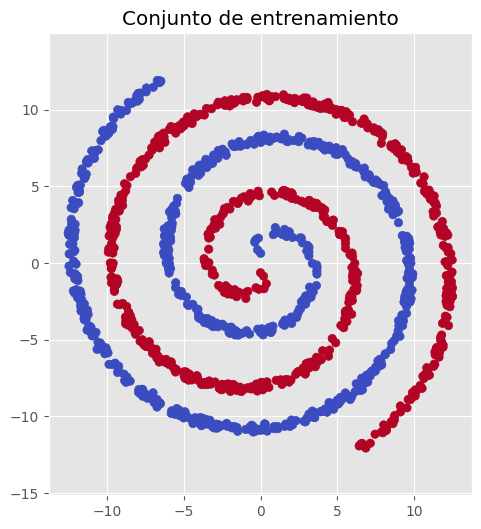

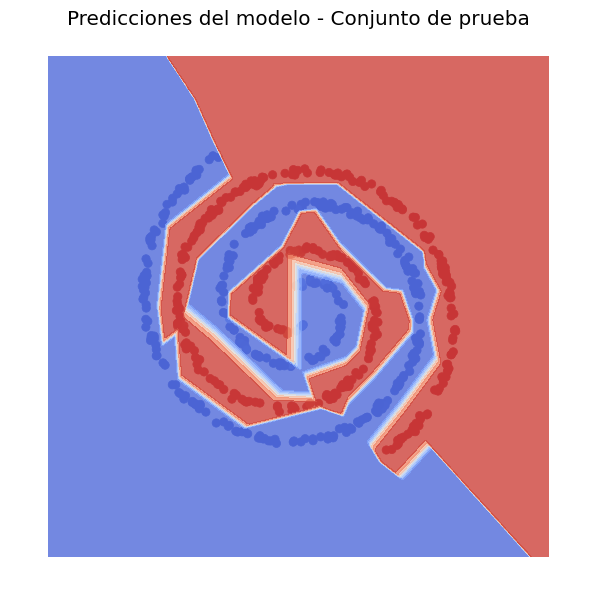

In [3]:
# Predicciones del primer modelo en el conjunto de prueba
predicciones_modelo1_conjunto_prueba = model1.predict(X_test)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm.coolwarm)
plt.title('Conjunto de entrenamiento')
plt.axis('equal');

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicciones_modelo1_conjunto_prueba[:, 0], cmap=cm.coolwarm)
plt.title('Predicciones del modelo - Conjunto de prueba')
plt.axis('equal')

xx = np.linspace(-20, 20, 400)
yy = np.linspace(-20, 20, 400)
gx, gy = np.meshgrid(xx, yy)
prediccion_grid = model1.predict(np.c_[gx.ravel(), gy.ravel()])
prediccion_grid = prediccion_grid.reshape(gx.shape)
plt.contourf(gx, gy, prediccion_grid, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-20, 20])
axes.set_ylim([-20, 20])
plt.grid('off')
plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
# Configuracion 2
model2 = Sequential()
model2.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))  # Aumento el número de neuronas en la primera capa oculta
model2.add(Dense(10, activation='relu'))  # Agrego otra capa oculta
model2.add(Dense(1, activation='sigmoid'))
optimizer = Adam(0.03)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train,epochs=1000,batch_size=512,validation_data=(X_test, y_test),verbose=0)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 999us/step


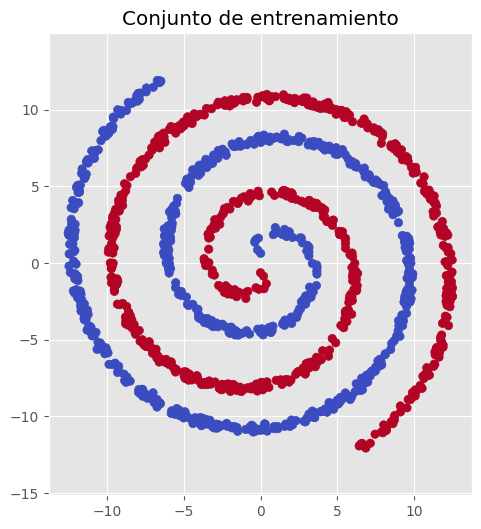

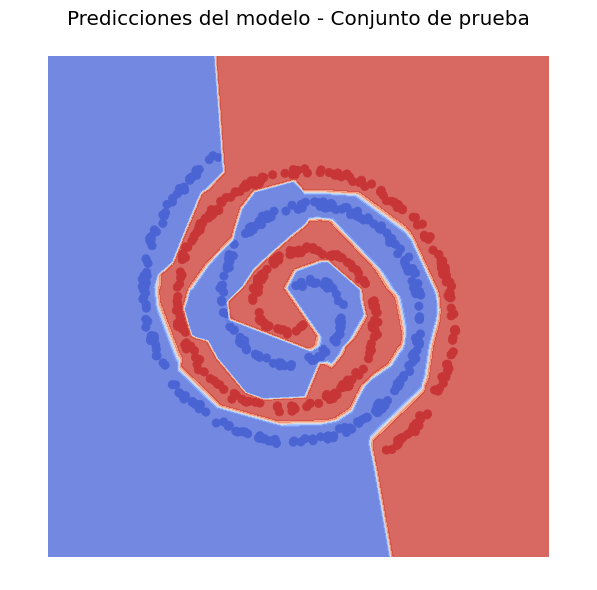

In [5]:
# Predicciones del primer modelo en el conjunto de prueba
predicciones_modelo2_conjunto_prueba = model2.predict(X_test)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm.coolwarm)
plt.title('Conjunto de entrenamiento')
plt.axis('equal');

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicciones_modelo2_conjunto_prueba[:, 0], cmap=cm.coolwarm)
plt.title('Predicciones del modelo - Conjunto de prueba')
plt.axis('equal')

xx = np.linspace(-20, 20, 400)
yy = np.linspace(-20, 20, 400)
gx, gy = np.meshgrid(xx, yy)
prediccion_grid = model2.predict(np.c_[gx.ravel(), gy.ravel()])
prediccion_grid = prediccion_grid.reshape(gx.shape)
plt.contourf(gx, gy, prediccion_grid, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-20, 20])
axes.set_ylim([-20, 20])
plt.grid('off')
plt.axis('off')

plt.tight_layout()
plt.show()
